<a href="https://colab.research.google.com/github/sivasriharshapulipati/Mobile-recommondation-sys/blob/main/Mobile_Phone_Recommender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Mobile Phone Recommender

In [25]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [26]:
# getting the dataset
df = pd.read_csv('/content/mainDataset.csv', encoding='unicode_escape')

In [27]:
df.head()

,Name,Rating,Price Rs,RAM Gb,ROM Gb,Expandable GB,Size Cm,Size Inch,R1 Cam MP,R2 Cam MP,R3 Cam MP,R4 Cam MP,Battery Mah,Processor,Image
0,"Realme Narzo 20 (Victory Blue, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
1,"Realme Narzo 20 (Victory Blue, 64 GB)",4.5,"10,499",4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
2,"Realme Narzo 20 (Glory Sliver, 128 GB)",4.5,"11,499",4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
3,"Realme Narzo 20 (Glory Sliver, 64 GB)",4.5,"10,499",4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...
4,"POCO M2 (Pitch Black, 64 GB)",4.4,"10,999",6,64,512.0,16.59,6.53,13.0,8.0,5,2.0,5000,MediaTek Helio G80 Processor,https://rukminim1.flixcart.com/image/312/312/k...


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           961 non-null    object 
 1   Rating         936 non-null    float64
 2   Price Rs       959 non-null    object 
 3   RAM Gb         961 non-null    int64  
 4   ROM Gb         961 non-null    int64  
 5   Expandable GB  715 non-null    float64
 6   Size Cm        961 non-null    float64
 7   Size Inch      961 non-null    float64
 8   R1 Cam MP      961 non-null    float64
 9   R2 Cam MP      619 non-null    float64
 10  R3 Cam MP      362 non-null    object 
 11  R4 Cam MP      205 non-null    float64
 12  Battery Mah    961 non-null    int64  
 13  Processor      961 non-null    object 
 14  Image          961 non-null    object 
dtypes: float64(7), int64(3), object(5)
memory usage: 112.7+ KB


In [29]:
df.shape

(961, 15)

In [30]:
# Data preprocessing
df['Rating'] = pd.to_numeric(df['Rating'])
df['Price Rs'] = df['Price Rs'].str.replace(',', '').astype(float)
df['RAM Gb'] = pd.to_numeric(df['RAM Gb'])
df['ROM Gb'] = pd.to_numeric(df['ROM Gb'])
df['Size Inch'] = pd.to_numeric(df['Size Inch'])
df['R1 Cam MP'] = pd.to_numeric(df['R1 Cam MP'])
df['Battery Mah'] = pd.to_numeric(df['Battery Mah'])

Benchmarking and visualizations

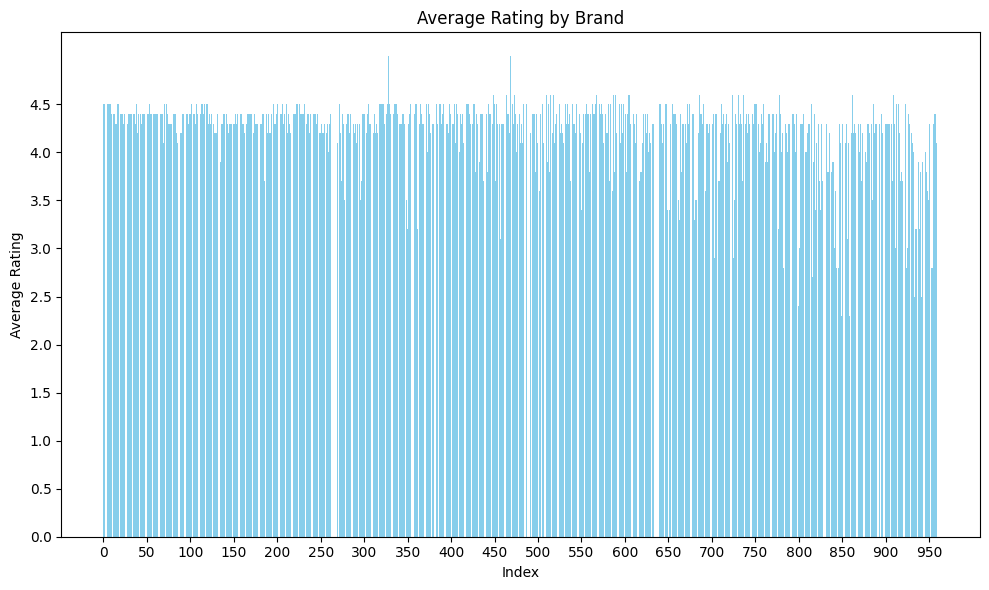

In [31]:
# Bar graph: Average Rating by Index
average_rating_by_index = df['Rating']
plt.figure(figsize=(10, 6))
plt.bar(df.index, average_rating_by_index, color='skyblue')
plt.title('Average Rating by Brand')
plt.xlabel('Index')
plt.ylabel('Average Rating')
plt.xticks(np.arange(0, len(df.index), 50))
plt.yticks(np.arange(0, 5, 0.5))
plt.tight_layout()
plt.show()

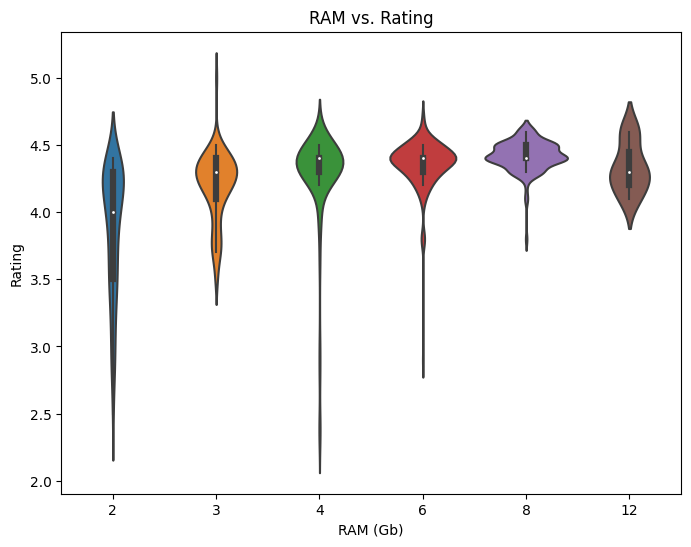

In [32]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='RAM Gb', y='Rating', data=df)
plt.title('RAM vs. Rating')
plt.xlabel('RAM (Gb)')
plt.ylabel('Rating')
plt.show()

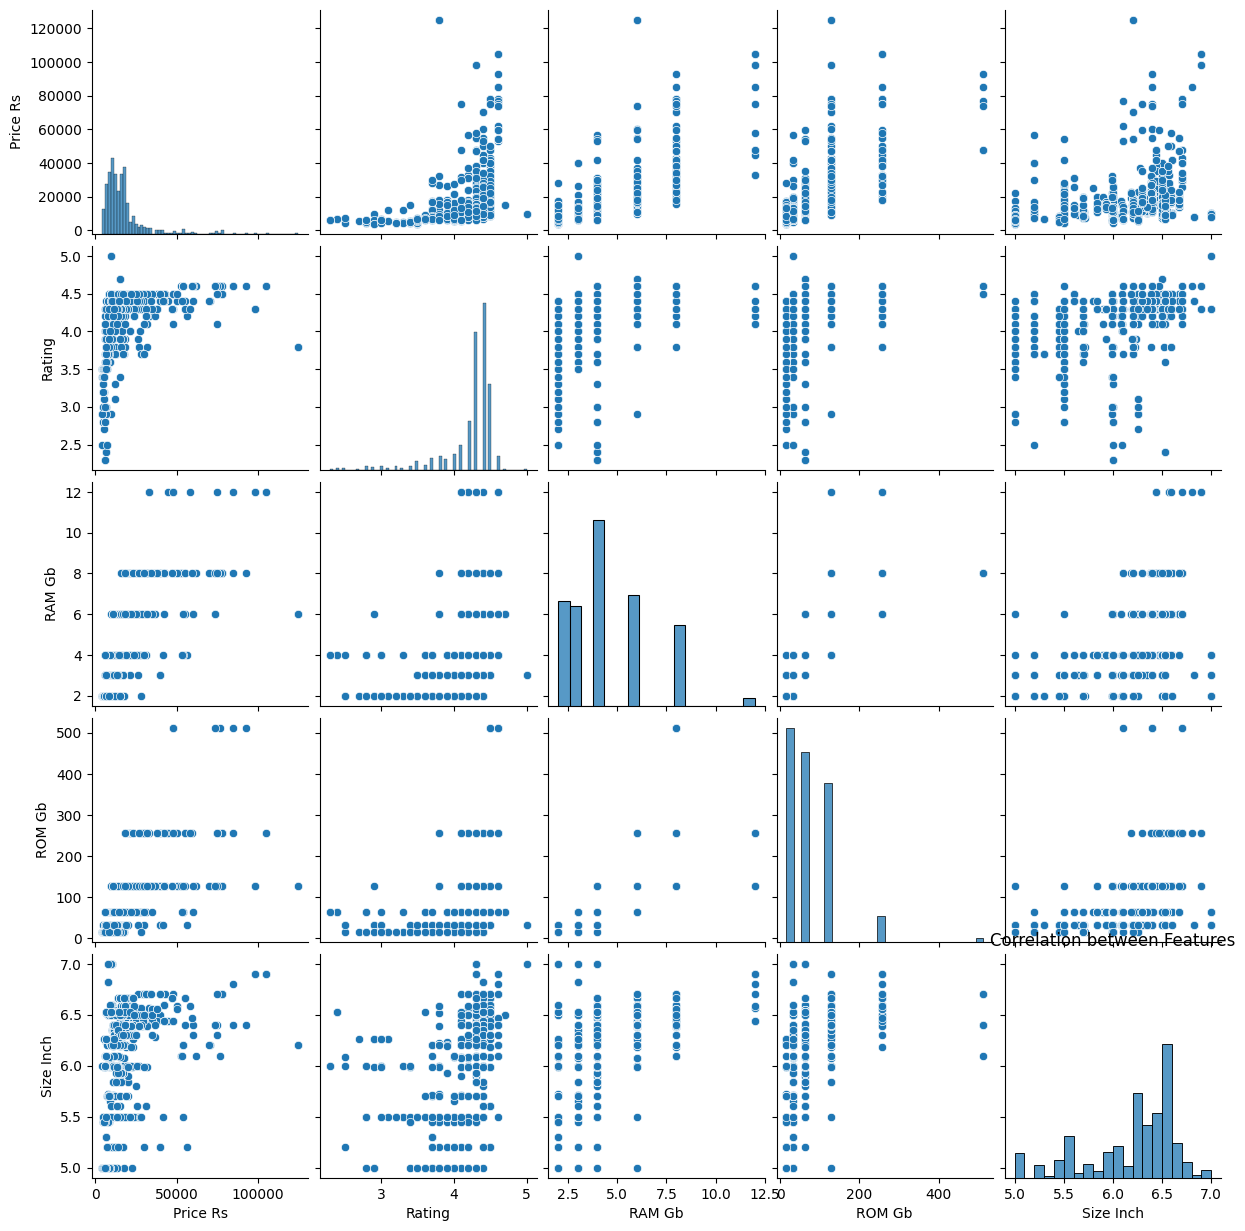

In [33]:
# Pairplot: Correlation between features
feature_subset = ['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch']
sns.pairplot(df[feature_subset])
plt.title('Correlation between Features')
plt.show()

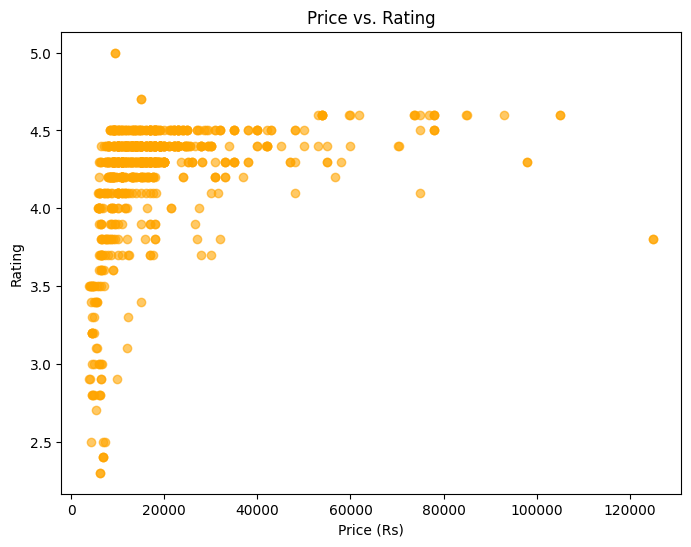

In [34]:
# Scatter plot: Price vs. Rating
plt.figure(figsize=(8, 6))
plt.scatter(df['Price Rs'], df['Rating'], color='orange', alpha=0.6)
plt.title('Price vs. Rating')
plt.xlabel('Price (Rs)')
plt.ylabel('Rating')
plt.show()

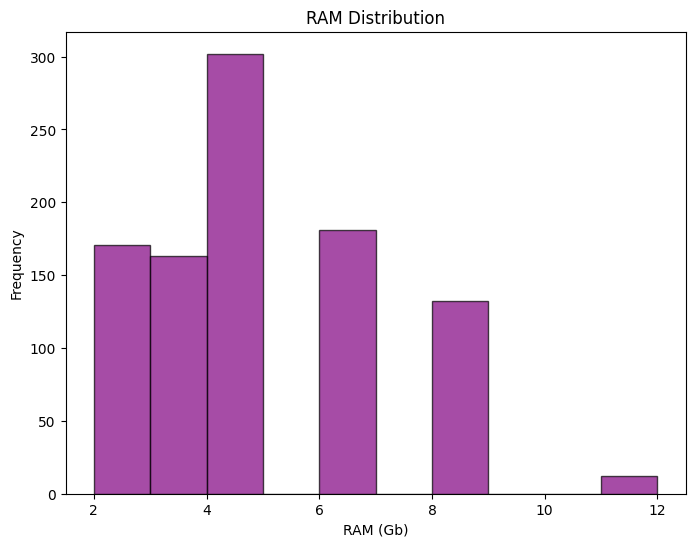

In [35]:
# Histogram: RAM Distribution
plt.figure(figsize=(8, 6))
plt.hist(df['RAM Gb'], bins=10, color='purple', edgecolor='black', alpha=0.7)
plt.title('RAM Distribution')
plt.xlabel('RAM (Gb)')
plt.ylabel('Frequency')
plt.show()

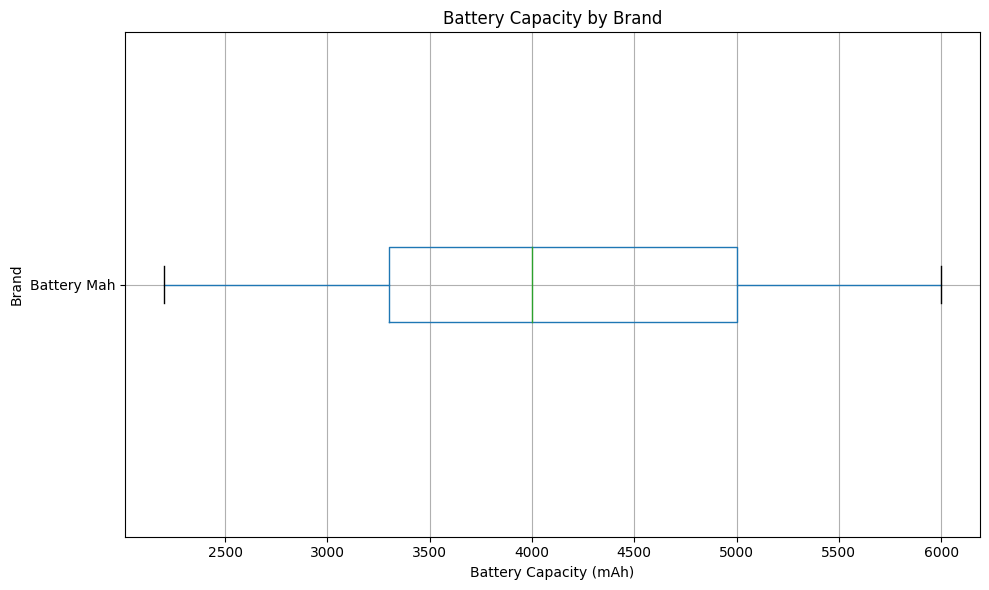

In [36]:
# Box plot: Battery Capacity by Brand
plt.figure(figsize=(10, 6))
df.boxplot(column='Battery Mah', vert=False)
plt.title('Battery Capacity by Brand')
plt.xlabel('Battery Capacity (mAh)')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()

In [37]:
# User Requirements and preferences

user_data = {
    "Name": ['harsha'],
    "Rating": [4],
    "Price Rs": [20000],
    "RAM Gb": [8],
    "ROM Gb": [128],
    "Expandable GB": [' '],
    "Size Cm": [' '],
    "Size Inch": [6.52],
    "R1 Cam MP": [58],
    "R2 Cam MP": [' '],
    "R3 Cam MP": [' '],
    "R4 Cam MP": [' '],
    "Battery Mah": [5000],
    "Processor": 'snapdragon ',
    "Image": ' '
}
user_df = pd.DataFrame(user_data);

df = pd.concat([user_df, df], ignore_index=True)

In [38]:
#Features Selection
features = ['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']
print(features)

['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']


In [39]:
#replacing the null values with null string
for feature in features:
  df[feature] = df[feature].fillna('')

<ipython-input-40-7591cb3eee1a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df[features].corr()


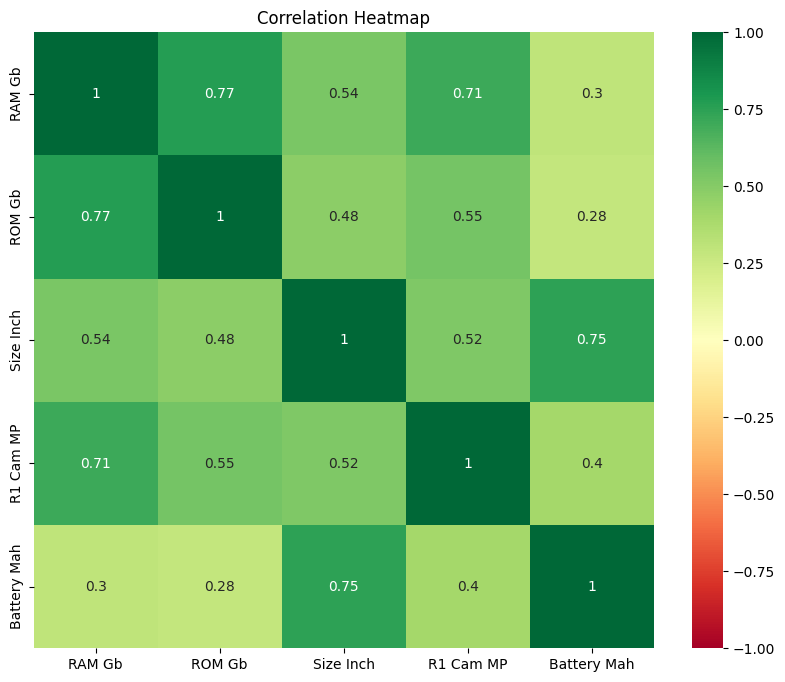

In [40]:
# Calculate the correlation matrix
correlation_matrix = df[features].corr()

# Plot the heat map
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')
plt.show()

In [41]:
# Create a column which will contain all these features
def combineFeatures(row):
    return ' '.join([str(row[feature]) for feature in features])

# This will create a separate column of combined features
df["combinedFeatures"] = df.apply(combineFeatures, axis=1)

In [42]:
df.head()

,Name,Rating,Price Rs,RAM Gb,ROM Gb,Expandable GB,Size Cm,Size Inch,R1 Cam MP,R2 Cam MP,R3 Cam MP,R4 Cam MP,Battery Mah,Processor,Image,combinedFeatures
0,harsha,4.0,20000.0,8,128,,,6.52,58.0,,,,5000,snapdragon,,20000.0 4.0 8 128 6.52 58.0 5000
1,"Realme Narzo 20 (Victory Blue, 128 GB)",4.5,11499.0,4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,11499.0 4.5 4 128 6.52 48.0 6000
2,"Realme Narzo 20 (Victory Blue, 64 GB)",4.5,10499.0,4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,10499.0 4.5 4 64 6.52 48.0 6000
3,"Realme Narzo 20 (Glory Sliver, 128 GB)",4.5,11499.0,4,128,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,11499.0 4.5 4 128 6.52 48.0 6000
4,"Realme Narzo 20 (Glory Sliver, 64 GB)",4.5,10499.0,4,64,256.0,16.56,6.52,48.0,8.0,2,NaN,6000,MediaTek Helio G85 Processor,https://rukminim1.flixcart.com/image/312/312/k...,10499.0 4.5 4 64 6.52 48.0 6000


In [43]:
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combinedFeatures'])

In [44]:
# Calculate cosine similarity
similar = cosine_similarity(count_matrix)

In [45]:
print(similar)

[[1.        0.4       0.2       ... 0.        0.        0.       ]
 [0.4       1.        0.6       ... 0.        0.        0.       ]
 [0.2       0.6       1.        ... 0.        0.        0.2236068]
 ...
 [0.        0.        0.        ... 1.        0.25      0.5      ]
 [0.        0.        0.        ... 0.25      1.        0.25     ]
 [0.        0.        0.2236068 ... 0.5       0.25      1.       ]]


In [46]:
print(similar.shape)

(962, 962)


In [47]:
# Get indices of similar phones
similar_phones = list(enumerate(similar[0]))

In [48]:
# Sort the entries according to similarity scores
sorted_similar_phones = sorted(similar_phones, key=lambda x: x[1], reverse=True)
similarity_matrix = pd.DataFrame(similar, columns=df['Name'], index=df['Name'])

In [49]:
# Retrieve the most similar 10 phones
top_10_phones = []
for phone in sorted_similar_phones:
    if df.loc[phone[0], 'Name'] != 'User Req name':
        top_10_phones.append(df.loc[phone[0], 'Name'])
    if len(top_10_phones) == 11:
        break

# Print the most similar phones
i = 1
for i in range(1,11):
  print( i , "-",top_10_phones[i])


1 - OPPO A9 2020 (Vanilla Mint, 128 GB)
2 - OPPO A9 2020 (Vanilla Mint, 128 GB)
3 - Motorola One Fusion+ (Twilight Blue, 128 GB)
4 - Realme Narzo 10 (That Blue, 128 GB)
5 - Motorola One Fusion+ (Moonlight White, 128 GB)
6 - Realme Narzo 10 (That White, 128 GB)
7 - OPPO A53 (Fairy White, 128 GB)
8 - OPPO A53 (Fancy Blue, 128 GB)
9 - Realme 7 (Mist Blue, 128 GB)
10 - Realme 7 (Mist White, 128 GB)


In [50]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Read the dataset
df = pd.read_csv('/content/mainDataset.csv', encoding='unicode_escape')

# Get user data and create a DataFrame
user_data = {
    "Name": ['harsha'],
    "Rating": [4],
    "Price Rs": [20000],
    "RAM Gb": [8],
    "ROM Gb": [128],
    "Expandable GB": [' '],
    "Size Cm": [' '],
    "Size Inch": [6.52],
    "R1 Cam MP": [58],
    "R2 Cam MP": [' '],
    "R3 Cam MP": [' '],
    "R4 Cam MP": [' '],
    "Battery Mah": [5000],
    "Processor": 'snapdragon ',
    "Image": ' '
}
user_df = pd.DataFrame(user_data)

# Concatenate user data with the dataframe
df = pd.concat([user_df, df], ignore_index=True)

# Select Features
features = ['Price Rs', 'Rating', 'RAM Gb', 'ROM Gb', 'Size Inch', 'R1 Cam MP', 'Battery Mah']

# Create a column which will contain all these features
def combineFeatures(row):
    return ' '.join([str(row[feature]) for feature in features])

# This will create a separate column of combined features
df["combinedFeatures"] = df.apply(combineFeatures, axis=1)

# Create count matrix
cv = CountVectorizer()
count_matrix = cv.fit_transform(df['combinedFeatures'])

# Calculate cosine similarity
similar = cosine_similarity(count_matrix)

# Get indices of similar phones
similar_phones = list(enumerate(similar[0]))

# Sort the entries according to similarity scores
sorted_similar_phones = sorted(similar_phones, key=lambda x: x[1], reverse=True)

# Retrieve the most similar 10 phones
top_10_phones = []
for phone in sorted_similar_phones:
    if df.loc[phone[0], 'Name'] != 'User Req name':
        top_10_phones.append(df.loc[phone[0], 'Name'])
    if len(top_10_phones) == 11:
        break

# Print the most similar phones
i = 1
for i in range(1,11):
  print( i , "-",top_10_phones[i])

1 - OPPO A9 2020 (Vanilla Mint, 128 GB)
2 - OPPO A9 2020 (Vanilla Mint, 128 GB)
3 - Realme C3 (Volcano Grey, 64 GB)
4 - Realme C3 (Frozen Blue, 32 GB)
5 - Tecno Spark Go 2020 (Ice jadeite, 32 GB)
6 - Tecno Spark Go 2020 (Aqua Blue, 32 GB)
7 - Realme C3 (Volcano Grey, 32 GB)
8 - Realme C3 (Blazing Red, 64 GB)
9 - Motorola One Fusion+ (Twilight Blue, 128 GB)
10 - Realme Narzo 10A (So White, 32 GB)
